In [1]:
import pygmt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

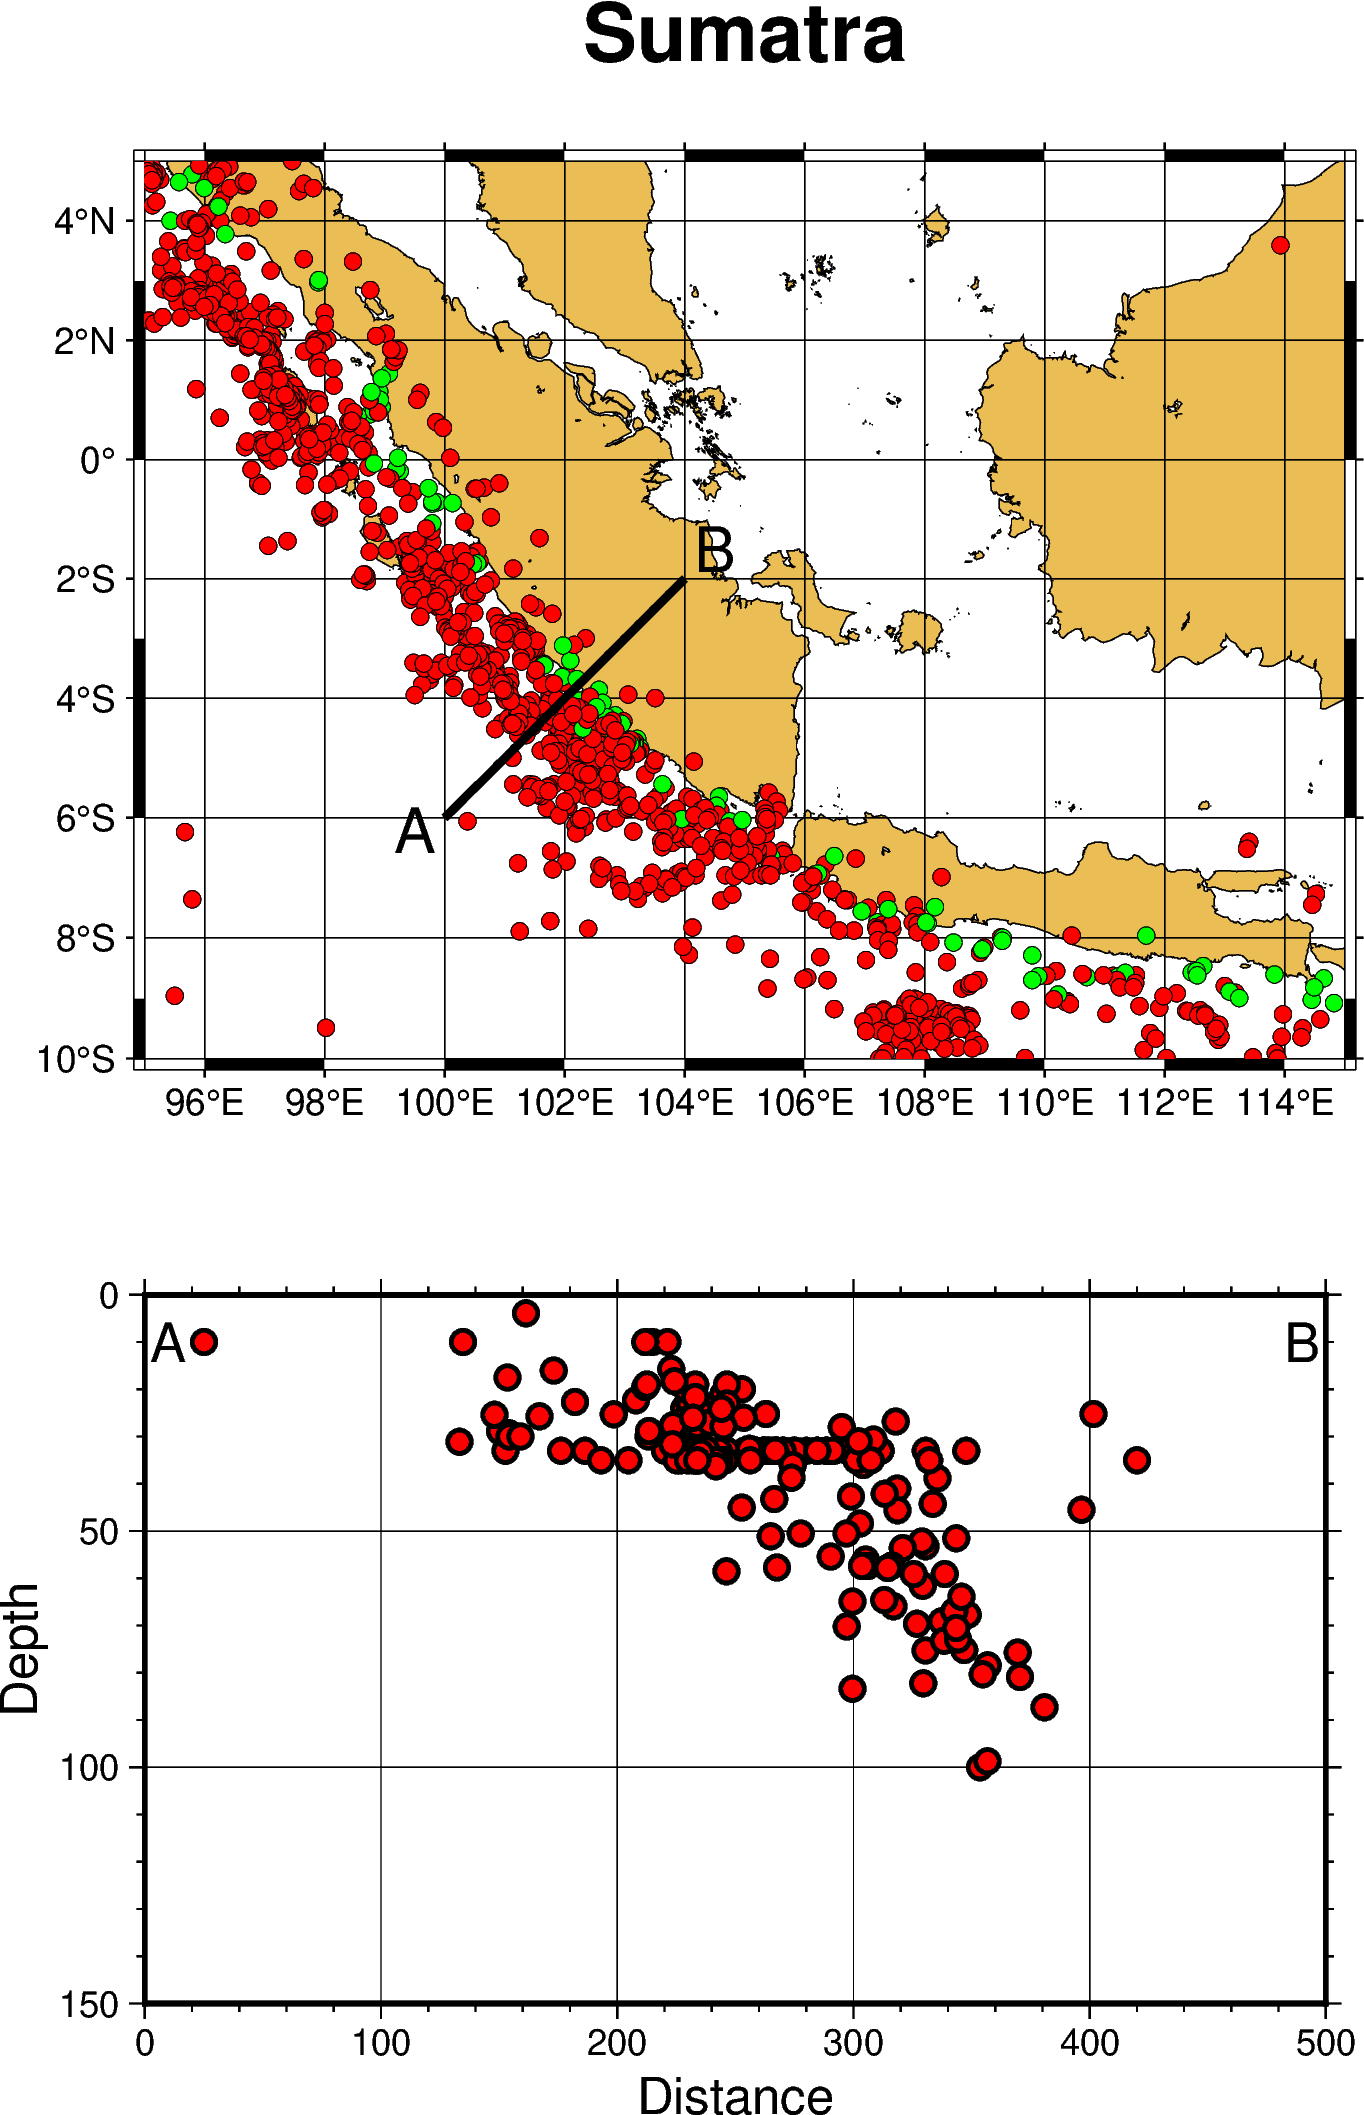

In [2]:
fig = pygmt.Figure()

pygmt.makecpt(cmap="red,green,blue", series="0,70,300,10000", output="quakes.cpt")

fig.coast(
    region=[95, 115, -10, 5],
    projection="M4i",
    frame=["xa2g2", "ya2g2pf3", '+t"Sumatra"'],
    land="lightbrown",
    shorelines="0.25p",
)
fig.plot(data="eq.dat", pen="faint", style="c0.15", cmap="quakes.cpt")
fig.plot(x=[100, 104], y=[-6, -2], projection="M", pen=2)
fig.text(x=99.5, y=-6.2, text="A", font="15,Helvetica")
fig.text(x=104.5, y=-1.5, text="B", font="15,Helvetica")

pygmt.project(
    data="eq.dat",
    unit=True,
    center=[100, -6.0],
    endpoint=[104.0, -2],
    convention="pz",
    width=[-100, 100],
    outfile="cross.dat",
)
fig.shift_origin(yshift=-8)
fig.basemap(
    projection="X10/-6",
    region=[0, 500, 0, 150],
    frame=['xafg100+l"Distance"', 'yafg50+l"Depth"', "WSen"]
)

fig.plot(data="cross.dat", projection="X", style="c0.2", pen=1, fill="red")
fig.text(x=10, y=10, text="A", font="13,Helvetica")
fig.text(x=490, y=10, text="B", font="13,Helvetica")

#fig.savefig(fname="sumatra.pdf")
fig.show()

# Testing 2

In [3]:
data = pygmt.datasets.load_sample_data(name="japan_quakes")

# Set the region for the plot to be slightly larger than the data bounds.
region = [
    data.longitude.min() - 1,
    data.longitude.max() + 1,
    data.latitude.min() - 1,
    data.latitude.max() + 1,
]

print(region)
print(data.head())

[131.29, 150.89, 34.02, 50.77]
   year  month  day  latitude  longitude  depth_km  magnitude
0  1987      1    4     49.77     149.29       489        4.1
1  1987      1    9     39.90     141.68        67        6.8
2  1987      1    9     39.82     141.64        84        4.0
3  1987      1   14     42.56     142.85       102        6.5
4  1987      1   16     42.79     145.10        54        5.1


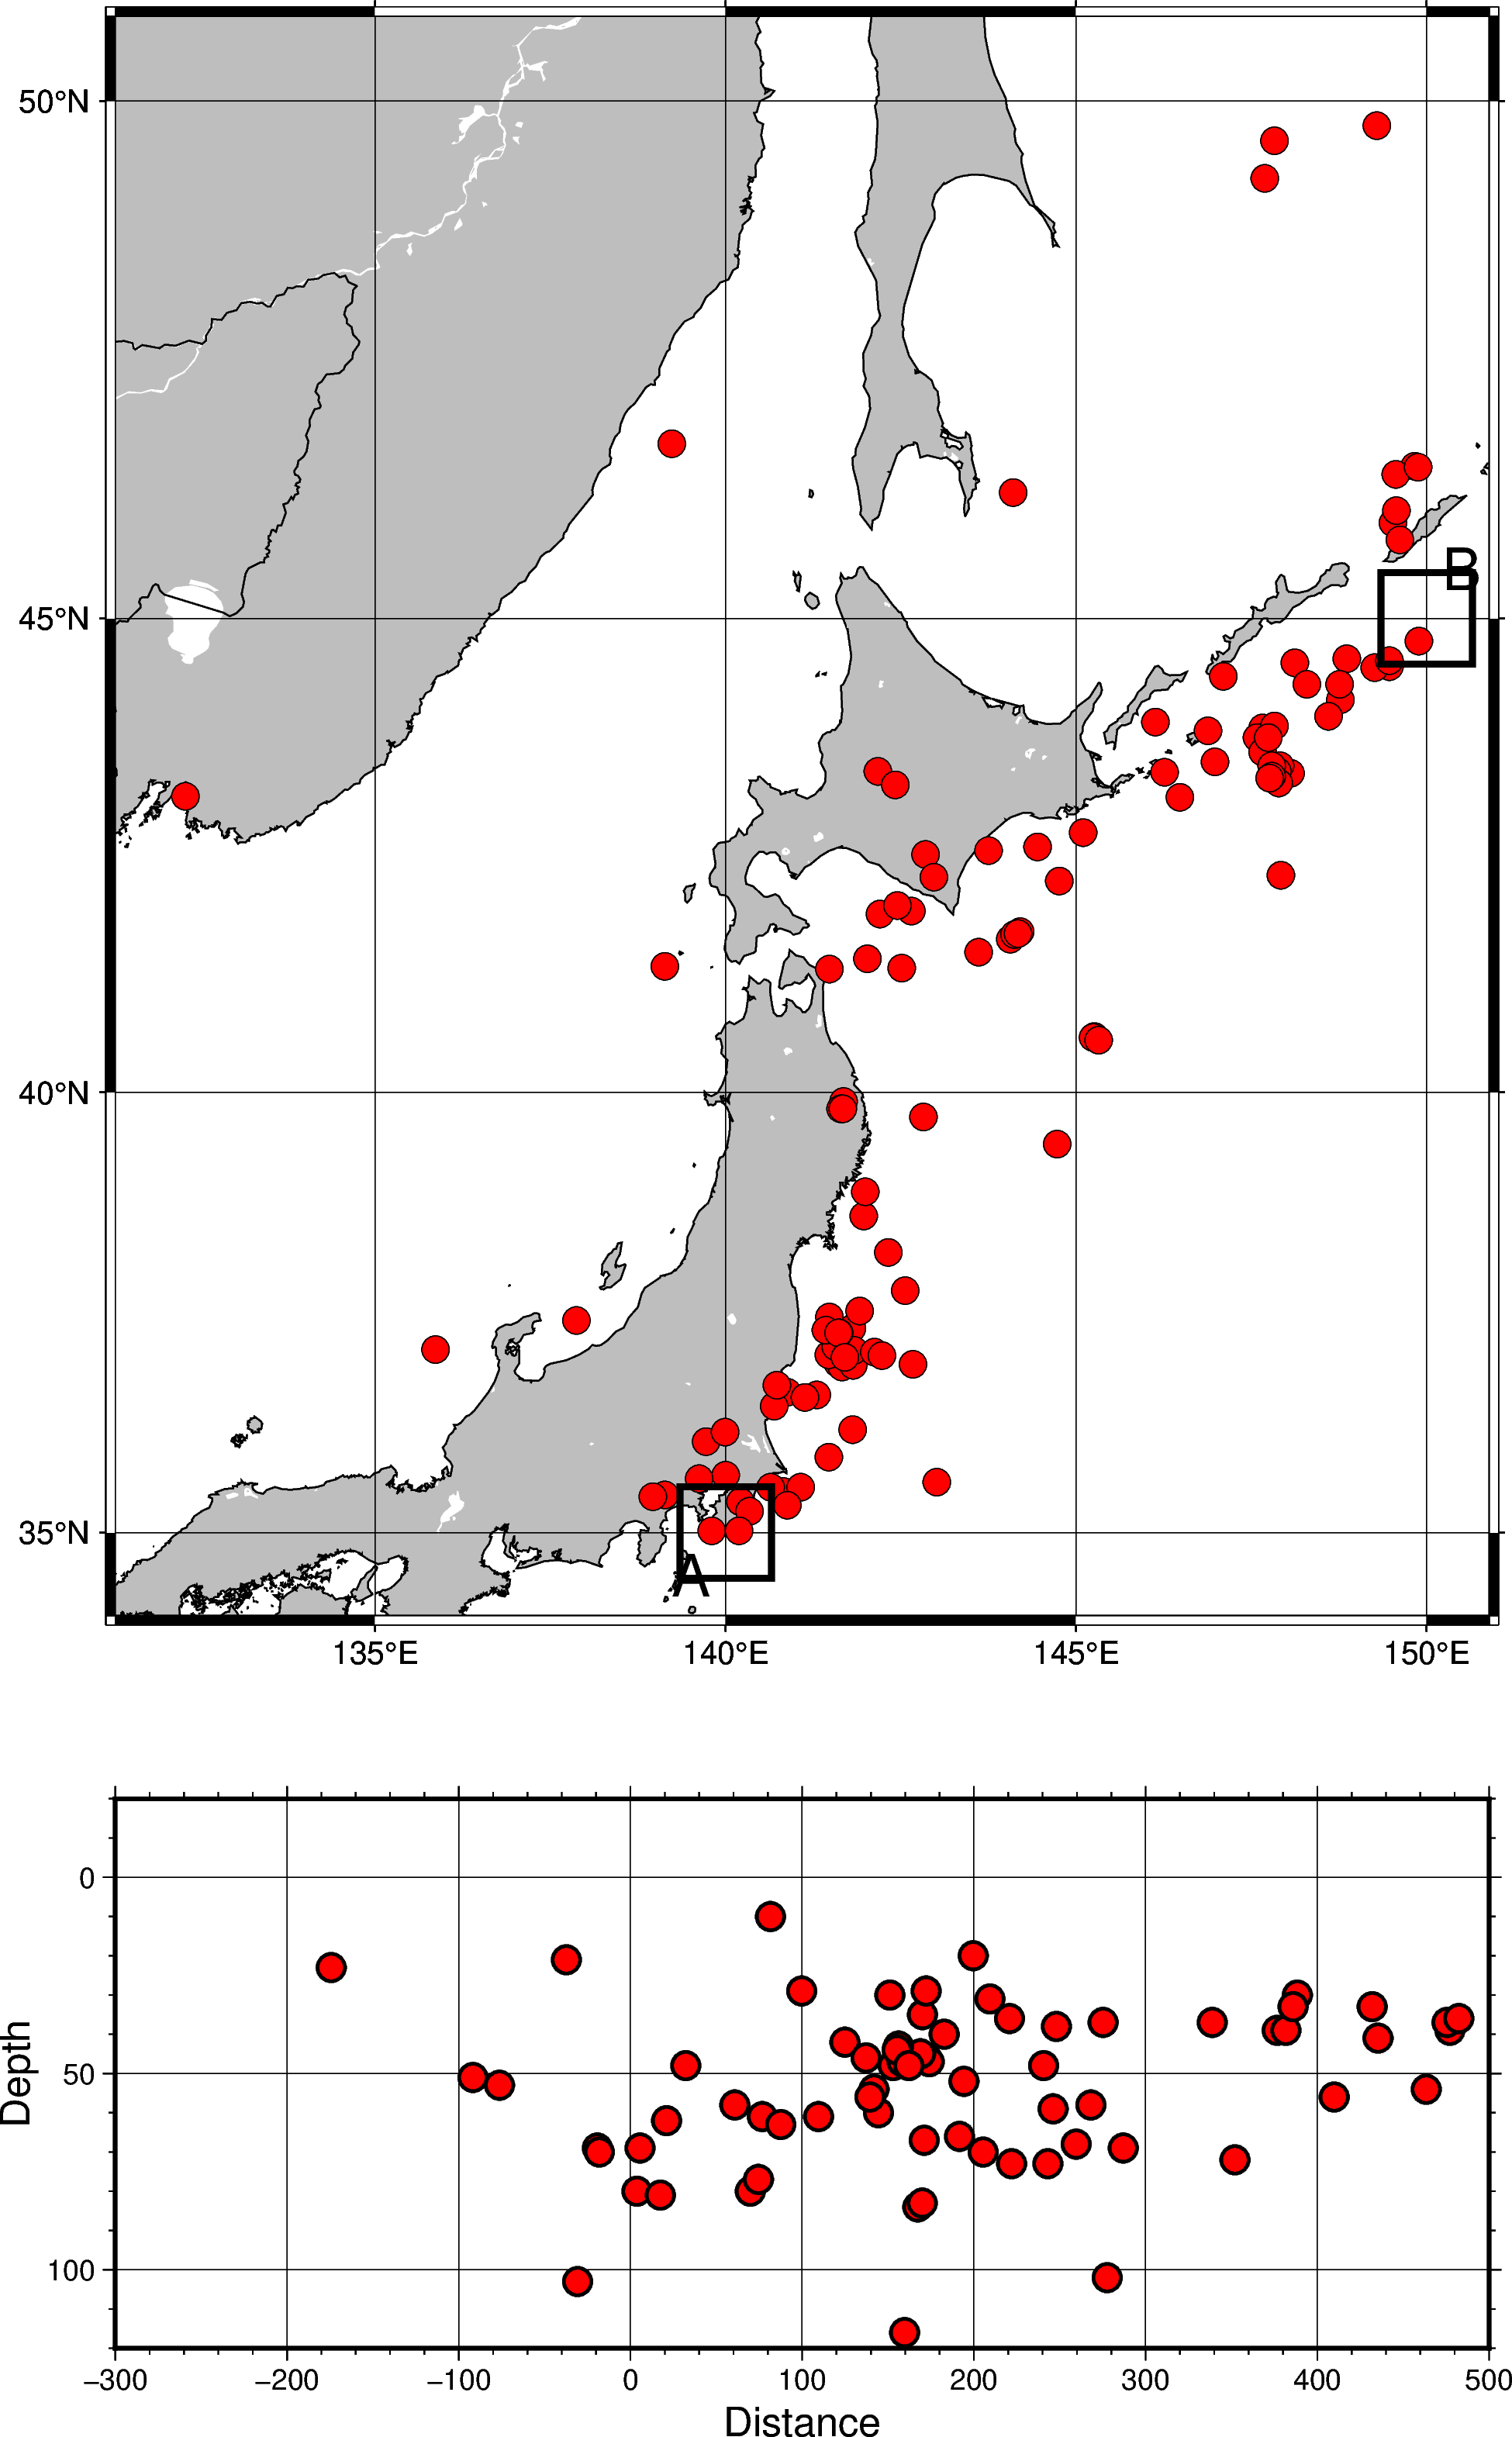

In [9]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="gray",water="white",borders="1/0.5p",shorelines="1/0.5p",frame="ag")

fig.plot(x=data.longitude, y=data.latitude, style="c0.3c", fill="red", pen="black")

fig.plot(x=[140, 150], y=[35, 45], projection="M", pen=2, style='j1')
fig.text(x=140-0.5, y=35-0.5, text="A", font="18,Helvetica")
fig.text(x=150+0.5, y=45+0.5, text="B", font="18,Helvetica")

# cross section A-B
pygmt.project(
    data="japan.dat",
    unit=True,
    center=[140, 35],
    endpoint=[150, 35],
    convention="pz",
    width=[-1000, 1000],
    outfile="japanAB.txt",
)

fig.shift_origin(yshift=-8)
fig.basemap(
    projection="X15/-6",
    region=[-300, 500, -20, 120],
    frame=['xafg100+l"Distance"', 'yafg50+l"Depth"', "WSen"],
)
# plot crossection
fig.plot(data="japanAB.txt", projection="X", style="c0.3", pen=1, fill="red")
fig.show()